 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [104]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [105]:
# Reading whale returns, Formating the date column in DateTime format, and sorting the DataFrame

whale_returns_df = pd.read_csv('Resources/whale_returns.csv', index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_returns_df.sort_index(inplace=True)
whale_returns_df.head()



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [106]:
# Count nulls
whale_returns_df.isnull().sum()


SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [107]:
# Drop nulls
whale_returns_df = whale_returns_df.dropna()
whale_returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [108]:
# Check the variables type
whale_returns_df.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [109]:
# Reading algorithmic returns

algo_returns_df = pd.read_csv('Resources/algo_returns.csv', index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns_df.sort_index(inplace=True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [110]:
# Count nulls 
algo_returns_df.isnull().sum()  

Algo 1    0
Algo 2    6
dtype: int64

In [111]:
# Drop nulls
algo_returns_df = algo_returns_df.dropna() 
algo_returns_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [112]:
algo_returns_df.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [113]:
# Reading S&P 500 Closing Prices

sp500_history_df = pd.read_csv('Resources/sp500_history.csv', index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_history_df.sort_index(inplace=True)
sp500_history_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [114]:
# Check Data Types
sp500_history_df.dtypes

Close    object
dtype: object

In [115]:
# Fix Data Types
sp500_history_df['Close'] = sp500_history_df['Close'].str.replace('$','')
sp500_history_df

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [116]:
sp500_history_df.dtypes

Close    object
dtype: object

In [117]:
sp500_history_df['Close'] = sp500_history_df['Close'].astype('float')
sp500_history_df.dtypes

Close    float64
dtype: object

In [118]:
# Calculate Daily Returns
sp500_daily_returns = sp500_history_df.pct_change() #In the case the DF has more than 1 column, how to id the pct_change column?
sp500_daily_returns

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [119]:
# Drop nulls
sp500_daily_returns = sp500_daily_returns.dropna()
sp500_daily_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [120]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns = sp500_daily_returns.rename(columns={'Close':"sp500"})
sp500_daily_returns.head()

,sp500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [121]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_Returns_columns = pd.concat([whale_returns_df, algo_returns_df, sp500_daily_returns], axis='columns', join='inner')
combined_Returns_columns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns For All Portfolios'}, xlabel='Date'>

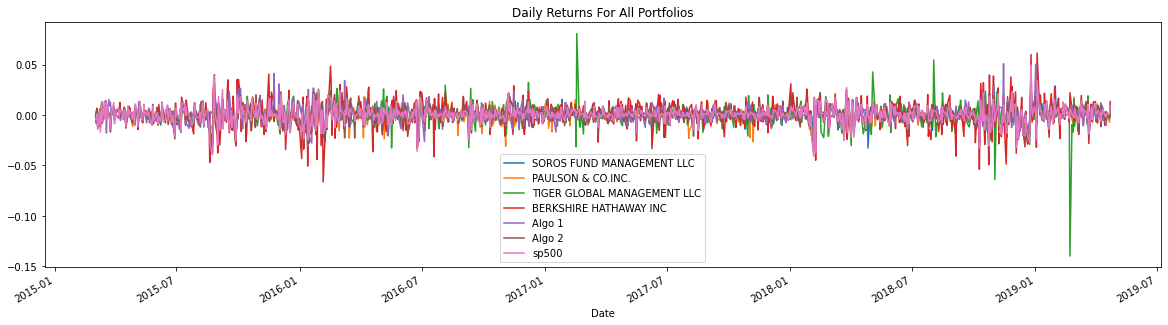

In [122]:
# Plot daily returns of all portfolios
(combined_Returns_columns).plot(figsize = (20, 5), title = 'Daily Returns For All Portfolios' )


#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns For All Portfolios'}, xlabel='Date'>

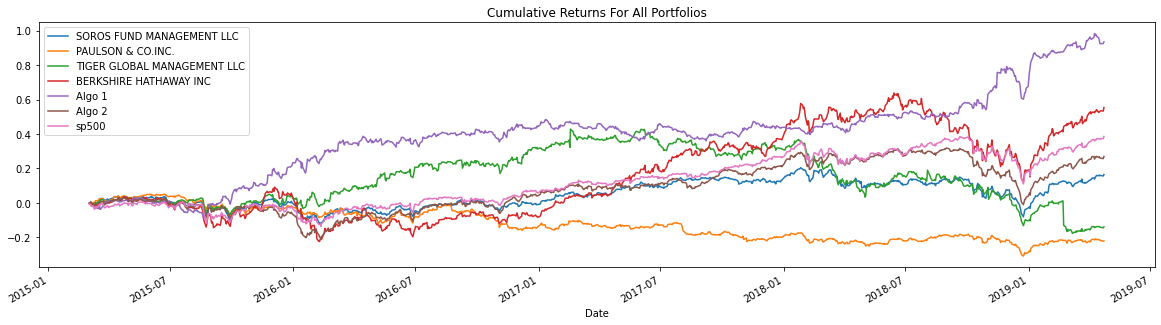

In [123]:
# Calculate cumulative returns of all portfolios
cumulative_returns_all =  (1 + combined_Returns_columns).cumprod() - 1
cumulative_returns_all

# Plot cumulative returns
cumulative_returns_all.plot(figsize = (20,5), title ='Cumulative Returns For All Portfolios')

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Whale Returns Box Plot'}>

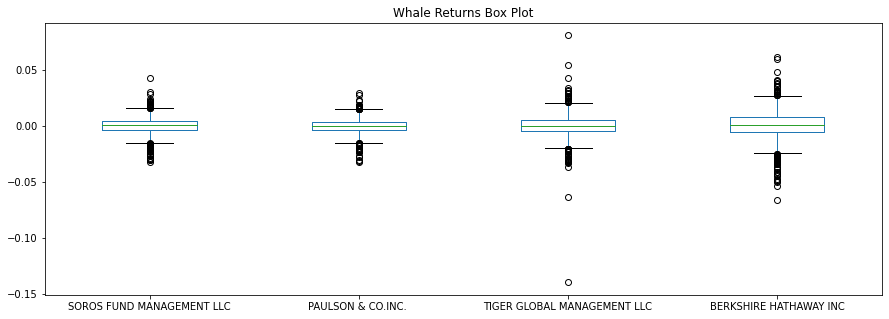

In [124]:
# Box plot to visually show risk
whale_returns_df.plot.box(figsize=(15,5), title = 'Whale Returns Box Plot')

<AxesSubplot:title={'center':'Algorithmic Returns Box Plot'}>

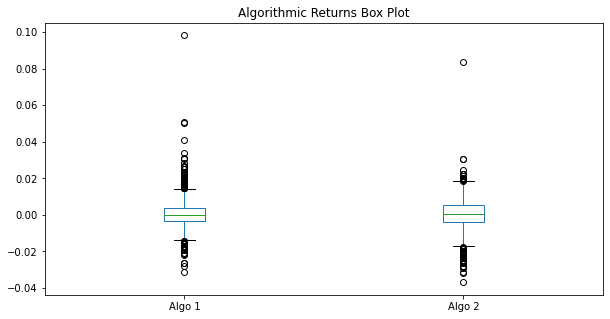

In [125]:
algo_returns_df.plot.box(figsize =(10,5), title = 'Algorithmic Returns Box Plot')

<AxesSubplot:title={'center':'Whale Returns Box Plot'}>

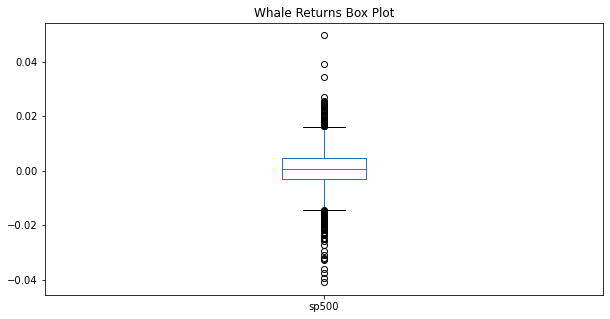

In [126]:
sp500_daily_returns.plot.box(figsize =(10,5), title = 'Whale Returns Box Plot')

<AxesSubplot:title={'center':'Combined Portfolios Box Plot'}>

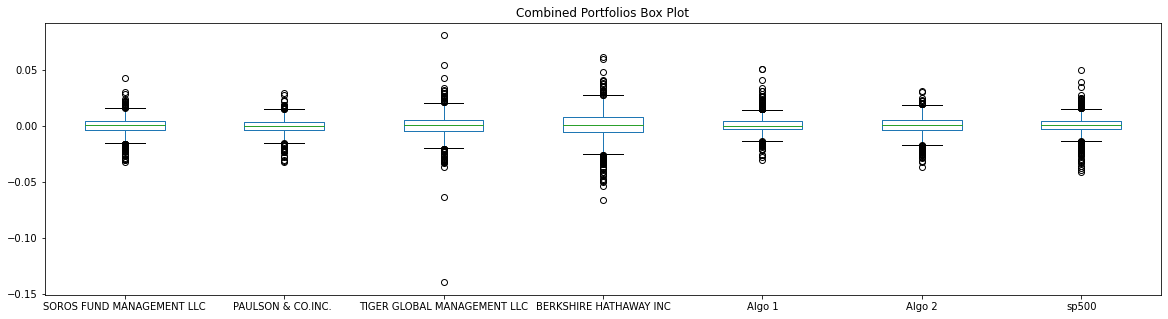

In [127]:
combined_Returns_columns.plot.box(figsize=(20,5), title = 'Combined Portfolios Box Plot')

### Calculate Standard Deviations

In [128]:
# Calculate the daily standard deviations of all portfolios

In [129]:
# Daily Standard Deviation for Whale returns
whale_returns_std = whale_returns_df.std()
whale_returns_std

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64

In [130]:
# Daily Standard Deviation for Algorithmic returns
algo_returns_std = algo_returns_df.std()
algo_returns_std

Algo 1    0.007988
Algo 2    0.008466
dtype: float64

In [131]:
# Daily Standard Deviation for S&P500 returns
sp500_std = sp500_daily_returns.std()
sp500_std

sp500    0.008111
dtype: float64

In [132]:
# Daily Standard Deviation for all Portfolio
combined_Returns_std = combined_Returns_columns.std()
combined_Returns_std
combined_Returns_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
sp500                          0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [133]:
# Calculate the daily standard deviation of S&P 500
sp500_std = sp500_daily_returns.std()
print(sp500_std)
# Determine which portfolios are riskier than the S&P 500
combined_Returns_std = combined_Returns_std.sort_values(ascending = False)
combined_Returns_std  

sp500    0.008111
dtype: float64


BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
sp500                          0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64

In [134]:
# From the Combined Portfolios series we can infer that the portfolios with grater Std Deviation that S&P 500 Std Dev(0.008554),
# are Riskier than the S&p 500; in this case Berkshire Hathaway Inc, and Tiger Global Managment LLC represent the greater Risk
# Portfolios.

### Calculate the Annualized Standard Deviation

In [203]:
# Calculate the annualized standard deviation (252 trading days)
volatility = combined_Returns_columns.std()*np.sqrt(252)
volatility = volatility.sort_values(ascending = False)
volatility

BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
sp500                          0.135786
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
Algo 1                         0.120967
PAULSON & CO.INC.              0.111488
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [204]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_Returns_columns.rolling(window = 21).std().tail()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
Date,,,,,,,
2019-04-16,0.006711,0.006224,0.007532,0.009731,0.005760,0.007053,0.006498
2019-04-17,0.006773,0.006370,0.007574,0.009485,0.006229,0.007165,0.006537
2019-04-18,0.006633,0.006303,0.007328,0.009475,0.005834,0.007172,0.006470
2019-04-22,0.005915,0.006400,0.006197,0.009104,0.005831,0.007113,0.006094
2019-04-23,0.004315,0.005695,0.004949,0.006602,0.005889,0.005582,0.004325


<AxesSubplot:title={'center':'Rolling Standard Deviation For All Portfolios'}, xlabel='Date'>

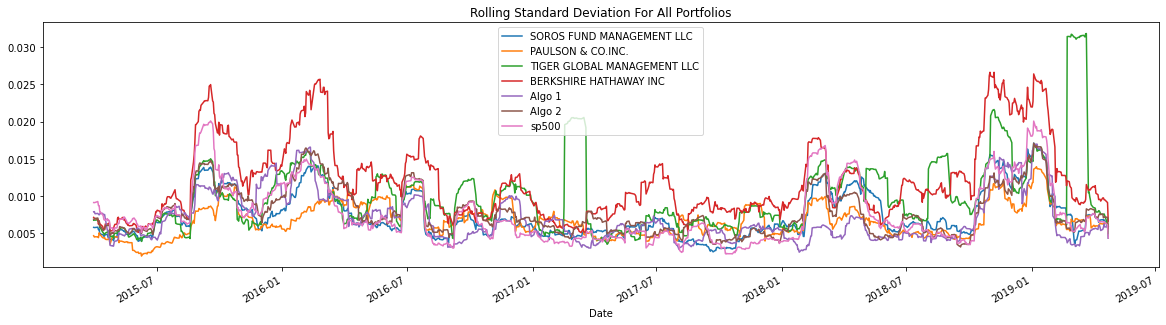

In [137]:
# Plot the rolling standard deviation
combined_Returns_columns.rolling(window = 21).std().plot(figsize = (20,5), title = 'Rolling Standard Deviation For All Portfolios')

### Calculate and plot the correlation

In [138]:
# Calculate the correlation
correlation = combined_Returns_columns.corr()
# Display de correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
sp500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


<AxesSubplot:>

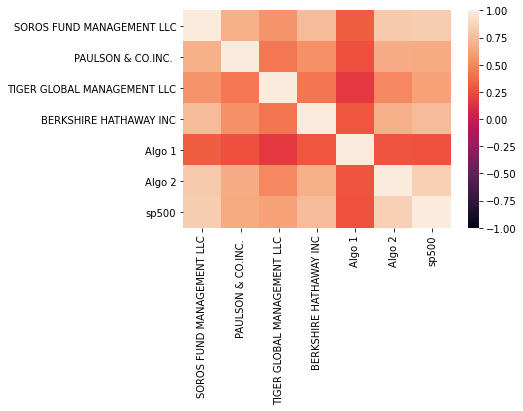

In [139]:
import seaborn as sns
sns.heatmap(correlation, vmin = -1, vmax = 1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

Covariance= 8.302834941861689e-05
Variance= 7.316632424648712e-05
BRK Beta= 1.1347891297491723


<AxesSubplot:title={'center':'Rolling 60-Day Beta of BRK'}, xlabel='Date'>

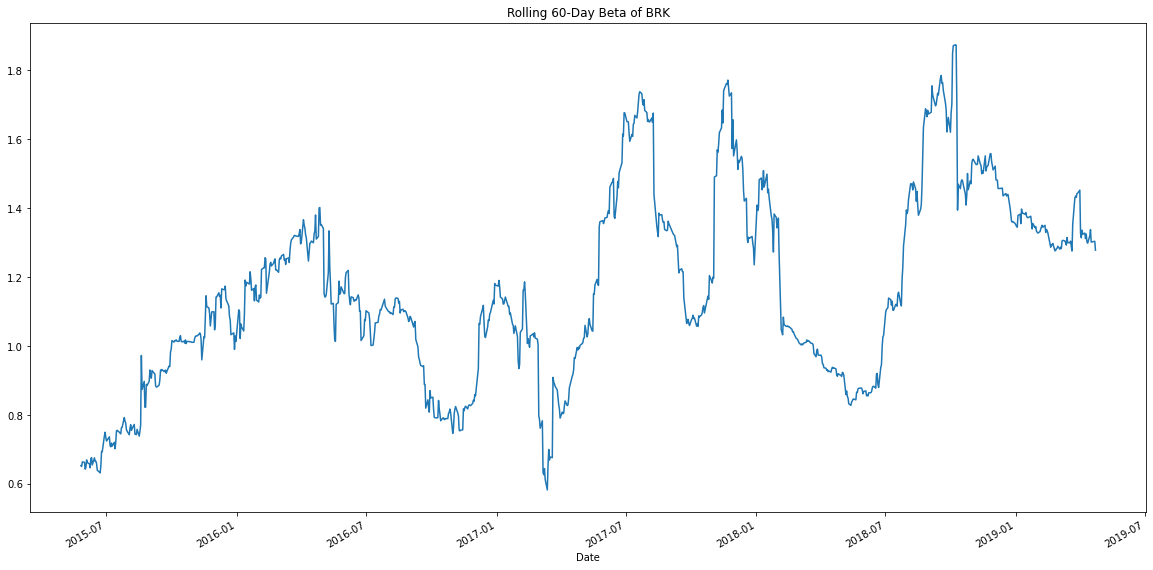

In [140]:
# Calculate covariance of a single portfolio; Barkshire Hathaway from Whale Returns vs S&P500
covariance = combined_Returns_columns['BERKSHIRE HATHAWAY INC'].cov(combined_Returns_columns['sp500'])
print(f'Covariance= {covariance}')

# Calculate variance of S&P 500
variance = combined_Returns_columns['sp500'].var()
print(f'Variance= {variance}')

# Computing  Berkshire Hathaway Inc beta
BRK_beta = covariance / variance
print(f'BRK Beta= {BRK_beta}')


# Plot beta trend for Berkshire Hathaway @ 60 days
rolling_covariance = combined_Returns_columns['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined_Returns_columns['sp500'])
rolling_variance = combined_Returns_columns['sp500'].rolling(window=60).var()
rolling_BRK_beta = rolling_covariance / rolling_variance
rolling_BRK_beta.plot(figsize=(20,10), title='Rolling 60-Day Beta of BRK')



## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [141]:
# Use `ewm` to calculate the rolling window #?????
#df['4dayEWM'] = df['sales'].ewm(span=4, adjust=False).mean()





---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [142]:
# Annualized Sharpe Ratios
correlation.sum(axis=0).sort_values()



Algo 1                         2.614209
TIGER GLOBAL MANAGEMENT LLC    3.715893
PAULSON & CO.INC.              4.296740
BERKSHIRE HATHAWAY INC         4.455893
Algo 2                         4.847528
SOROS FUND MANAGEMENT LLC      5.001465
sp500                          5.021171
dtype: float64

In [143]:
# Drop highly correlated stocks, and Keep only the non correlated (less correlated) stocks
noncorrelated_daily_returns = combined_Returns_columns.drop(columns=['SOROS FUND MANAGEMENT LLC', 'Algo 2'])
noncorrelated_daily_returns.head()

,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,sp500
Date,,,,,
2015-03-03,-0.004981,-0.000496,-0.006569,-0.001942,-0.004539
2015-03-04,0.003241,-0.002534,0.004213,-0.008589,-0.004389
2015-03-05,0.004076,0.002355,0.006726,-0.000955,0.001196
2015-03-06,-0.003574,-0.008481,-0.013098,-0.004957,-0.014174
2015-03-09,0.004225,0.005843,-0.001652,-0.005447,0.003944


Algo 1                         1.378648
sp500                          0.648267
BERKSHIRE HATHAWAY INC         0.621810
TIGER GLOBAL MANAGEMENT LLC   -0.121060
PAULSON & CO.INC.             -0.483570
dtype: float64


<AxesSubplot:title={'center':'Portfolios Anualized Sharpe Ratios'}>

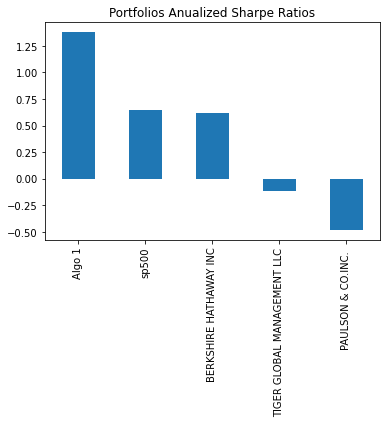

In [144]:
# Calculate anualized sharpe ratio using the 'mean' and 'std' functions 
sharpe_ratios = (noncorrelated_daily_returns.mean()) * 252 / (noncorrelated_daily_returns.std() * np.sqrt(252))
sharpe_ratios = sharpe_ratios.sort_values(ascending = False)
print(sharpe_ratios)

# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = 'bar', title = 'Portfolios Anualized Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

After determine the sharp ratios we can infer only Algo 1 out of the two Algorithmic Returns portfolio offers the better risk/reward ratio outperfroming both S&P 500 and famous Whale Returns portfolios. The Algo 2 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [145]:
# Reading data from 1st stock
AMZN_daily_close_df = pd.read_csv('Resources/AMZN_daily_close.csv', index_col="Date", infer_datetime_format=True, parse_dates=True, decimal = ',')
AMZN_daily_close_df.sort_index(inplace=True)
AMZN_daily_close_df.head()

,Close
Date,
2020-03-26 16:00:00,1955.49
2020-03-27 16:00:00,1900.10
2020-03-30 16:00:00,1963.95
2020-03-31 16:00:00,1949.72
2020-04-01 16:00:00,1907.70


In [146]:
#Determine AMZN daily return
#AMZN_daily_return = AMZN_daily_close_df.pct_change()
#AMZN_daily_return.head()

In [147]:
# Reading data from 2nd stock
BA_daily_close_df = pd.read_csv('Resources/BA_daily_close.csv', index_col="Date", infer_datetime_format=True, parse_dates=True, decimal = ',')
BA_daily_close_df.sort_index(inplace=True)
BA_daily_close_df.head()

,Close
Date,
2020-03-26 16:00:00,180.55
2020-03-27 16:00:00,162.00
2020-03-30 16:00:00,152.28
2020-03-31 16:00:00,149.14
2020-04-01 16:00:00,130.70


In [148]:
# Reading data from 3rd stock
BABA_daily_close_df = pd.read_csv('Resources/BABA_daily_close.csv', index_col="Date", infer_datetime_format=True, parse_dates=True, decimal = ',')
BABA_daily_close_df.sort_index(inplace=True)
BABA_daily_close_df.head()

,Close
Date,
2020-03-26 16:00:00,195.32
2020-03-27 16:00:00,188.59
2020-03-30 16:00:00,191.27
2020-03-31 16:00:00,194.48
2020-04-01 16:00:00,187.56


In [149]:
# Reading data from 4th stock

DAC_daily_close_df = pd.read_csv('Resources/DAC_daily_close.csv', index_col="Date", infer_datetime_format=True, parse_dates=True, decimal = ',')
DAC_daily_close_df.sort_index(inplace=True)
DAC_daily_close_df.head()

,Close
Date,
2020-03-26 16:00:00,4.16
2020-03-27 16:00:00,3.92
2020-03-30 16:00:00,4.08
2020-03-31 16:00:00,4.00
2020-04-01 16:00:00,3.83


In [188]:
# Reading data from 5th stock

PYPL_daily_close_df = pd.read_csv('Resources/PYPL_daily_close.csv', index_col="Date", infer_datetime_format=True, parse_dates=True, decimal = ',')
PYPL_daily_close_df.sort_index(inplace=True)
PYPL_daily_close_df.head()

,Close
Date,
2020-03-26 16:00:00,100.63
2020-03-27 16:00:00,93.48
2020-03-30 16:00:00,97.03
2020-03-31 16:00:00,95.74
2020-04-01 16:00:00,91.38


In [189]:
# Combine all stocks in a single DataFrame
# Join AMZON , BA, BABA, DAC, PYPL into a single DataFrame with columns for each portfolio's returns.
combined_close_columns = pd.concat([AMZN_daily_close_df, BA_daily_close_df, BABA_daily_close_df, DAC_daily_close_df, PYPL_daily_close_df], axis='columns', join='inner')
combined_close_columns

,Close,Close,Close,Close,Close
Date,,,,,
2020-03-26 16:00:00,1955.49,180.55,195.32,4.16,100.63
2020-03-27 16:00:00,1900.10,162.00,188.59,3.92,93.48
2020-03-30 16:00:00,1963.95,152.28,191.27,4.08,97.03
2020-03-31 16:00:00,1949.72,149.14,194.48,4.00,95.74
2020-04-01 16:00:00,1907.70,130.70,187.56,3.83,91.38
...,...,...,...,...,...
2021-03-19 16:00:00,3074.96,255.82,239.79,53.35,241.28
2021-03-22 16:00:00,3110.87,251.23,237.12,53.12,244.39
2021-03-23 16:00:00,3137.50,241.25,237.67,47.47,243.77


In [230]:
# Rename Columns

columns_custom = ['AMZN','BA','BABA','DAC','PYPL']
combined_close_columns.columns = columns_custom
combined_close_columns.head()

,AMZN,BA,BABA,DAC,PYPL
Date,,,,,
2020-03-26,1955.49,180.55,195.32,4.16,100.63
2020-03-27,1900.10,162.00,188.59,3.92,93.48
2020-03-30,1963.95,152.28,191.27,4.08,97.03
2020-03-31,1949.72,149.14,194.48,4.00,95.74
2020-04-01,1907.70,130.70,187.56,3.83,91.38


In [231]:
# Reset Date index
combined_close_columns.index = combined_close_columns.index.normalize()
combined_close_columns.head()

,AMZN,BA,BABA,DAC,PYPL
Date,,,,,
2020-03-26,1955.49,180.55,195.32,4.16,100.63
2020-03-27,1900.10,162.00,188.59,3.92,93.48
2020-03-30,1963.95,152.28,191.27,4.08,97.03
2020-03-31,1949.72,149.14,194.48,4.00,95.74
2020-04-01,1907.70,130.70,187.56,3.83,91.38


In [232]:

# Calculate daily returns
# Drop NAs
# Display sample data

combined_custom_returns = combined_close_columns.pct_change()
combined_custom_returns = combined_custom_returns.dropna()
combined_custom_returns.head()

,AMZN,BA,BABA,DAC,PYPL
Date,,,,,
2020-03-27,-0.028325,-0.102742,-0.034456,-0.057692,-0.071052
2020-03-30,0.033603,-0.060000,0.014211,0.040816,0.037976
2020-03-31,-0.007246,-0.020620,0.016783,-0.019608,-0.013295
2020-04-01,-0.021552,-0.123642,-0.035582,-0.042500,-0.045540
2020-04-02,0.005834,-0.056848,0.007144,-0.083551,0.023419


In [233]:
# Reorganize portfolio data by having a column per symbol
combined_custom_returns.columns = columns_custom
combined_custom_returns.head()

,AMZN,BA,BABA,DAC,PYPL
Date,,,,,
2020-03-27,-0.028325,-0.102742,-0.034456,-0.057692,-0.071052
2020-03-30,0.033603,-0.060000,0.014211,0.040816,0.037976
2020-03-31,-0.007246,-0.020620,0.016783,-0.019608,-0.013295
2020-04-01,-0.021552,-0.123642,-0.035582,-0.042500,-0.045540
2020-04-02,0.005834,-0.056848,0.007144,-0.083551,0.023419


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [234]:
# Set weights
weights = [0.20, 0.20, 0.20, 0.20, 0.20]

# Calculate  daily portfolio return
custom_portfolio_return = combined_custom_returns.dot(weights)

# Display sample data
custom_portfolio_return.tail()




Date
2021-03-19    0.025123
2021-03-22   -0.001764
2021-03-23   -0.027549
2021-03-24   -0.014040
2021-03-25    0.009149
dtype: float64

In [235]:
# Calculate Cumulative return

custom_portfolio_cumulative_return = (1+ custom_portfolio_return).cumprod()
custom_portfolio_cumulative_return.tail()


Date
2021-03-19    2.707191
2021-03-22    2.702415
2021-03-23    2.627967
2021-03-24    2.591071
2021-03-25    2.614776
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [236]:
# Join your returns DataFrame to the original returns DataFrame
combined_custom_returns['Daily_Return'] = custom_portfolio_return
combined_custom_returns.head()

,AMZN,BA,BABA,DAC,PYPL,Daily_Return
Date,,,,,,
2020-03-27,-0.028325,-0.102742,-0.034456,-0.057692,-0.071052,-0.058854
2020-03-30,0.033603,-0.060000,0.014211,0.040816,0.037976,0.013321
2020-03-31,-0.007246,-0.020620,0.016783,-0.019608,-0.013295,-0.008797
2020-04-01,-0.021552,-0.123642,-0.035582,-0.042500,-0.045540,-0.053763
2020-04-02,0.005834,-0.056848,0.007144,-0.083551,0.023419,-0.020800


In [237]:
combined_custom_returns['Cumul_Return'] = custom_portfolio_cumulative_return
combined_custom_returns.head()

,AMZN,BA,BABA,DAC,PYPL,Daily_Return,Cumul_Return
Date,,,,,,,
2020-03-27,-0.028325,-0.102742,-0.034456,-0.057692,-0.071052,-0.058854,0.941146
2020-03-30,0.033603,-0.060000,0.014211,0.040816,0.037976,0.013321,0.953684
2020-03-31,-0.007246,-0.020620,0.016783,-0.019608,-0.013295,-0.008797,0.945294
2020-04-01,-0.021552,-0.123642,-0.035582,-0.042500,-0.045540,-0.053763,0.894472
2020-04-02,0.005834,-0.056848,0.007144,-0.083551,0.023419,-0.020800,0.875867


In [238]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_custom_returns.isnull().mean()

AMZN            0.0
BA              0.0
BABA            0.0
DAC             0.0
PYPL            0.0
Daily_Return    0.0
Cumul_Return    0.0
dtype: float64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [239]:
# Calculate the annualized `std`
# Remove Portlio Daily and Cumulative Returns from DataFrame
combined_custom_returns = combined_custom_returns.drop(columns =["Daily_Return","Cumul_Return"])
combined_custom_returns.head()




,AMZN,BA,BABA,DAC,PYPL
Date,,,,,
2020-03-27,-0.028325,-0.102742,-0.034456,-0.057692,-0.071052
2020-03-30,0.033603,-0.060000,0.014211,0.040816,0.037976
2020-03-31,-0.007246,-0.020620,0.016783,-0.019608,-0.013295
2020-04-01,-0.021552,-0.123642,-0.035582,-0.042500,-0.045540
2020-04-02,0.005834,-0.056848,0.007144,-0.083551,0.023419


In [240]:
# Calculate the annualized standard deviation (252 trading days)
volatility = combined_custom_returns.std()*np.sqrt(252)
volatility = volatility.sort_values(ascending = False)
volatility

DAC     0.891417
BA      0.682812
PYPL    0.460935
BABA    0.410239
AMZN    0.343218
dtype: float64

In [241]:
### Calculate and plot rolling `std` with 21-day window


In [242]:
# Calculate Rolling Standard Deviation
combined_custom_returns.rolling(window = 21).std().tail()

,AMZN,BA,BABA,DAC,PYPL
Date,,,,,
2021-03-19,0.019127,0.037751,0.024687,0.050485,0.037084
2021-03-22,0.018832,0.037460,0.024730,0.050153,0.037342
2021-03-23,0.018418,0.038382,0.023673,0.056805,0.036283
2021-03-24,0.018687,0.038459,0.024628,0.053874,0.036563
2021-03-25,0.018752,0.035074,0.025240,0.051987,0.036521


<AxesSubplot:title={'center':'Portfolio 21-Day Window Rolling Standard Deviation'}, xlabel='Date'>

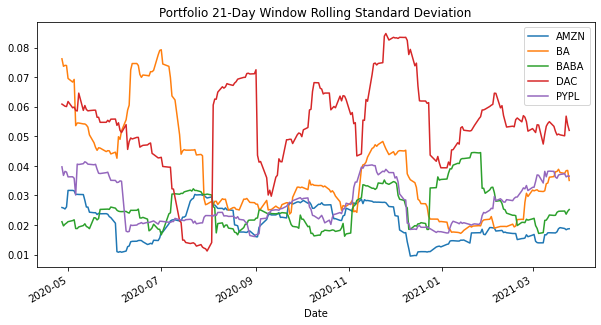

In [243]:
# Plot rolling standard deviation
combined_custom_returns.rolling(window = 21).std().plot(figsize=(10,5), title= 'Portfolio 21-Day Window Rolling Standard Deviation') 

### Calculate and plot the correlation

In [244]:
# Calculate and plot the correlation
correlation = combined_custom_returns.corr()
correlation

,AMZN,BA,BABA,DAC,PYPL
AMZN,1.000000,0.088057,0.468730,0.034211,0.575685
BA,0.088057,1.000000,0.168384,0.408558,0.182489
BABA,0.468730,0.168384,1.000000,0.020322,0.366855
DAC,0.034211,0.408558,0.020322,1.000000,0.128056
PYPL,0.575685,0.182489,0.366855,0.128056,1.000000


<AxesSubplot:>

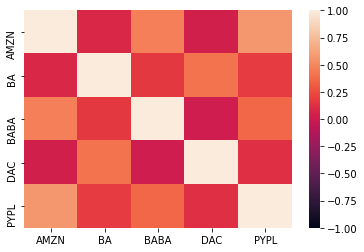

In [245]:
sns.heatmap(correlation, vmin = -1, vmax = 1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [246]:
# Calculate and plot Beta
# Import .INX index to calculate SP500 Raturn in period
# Reading data from .INX
TX60_daily_close_df = pd.read_csv('Resources/TX60_daily_close.csv', index_col="Date", infer_datetime_format=True, parse_dates=True, decimal = ',')
TX60_daily_close_df.sort_index(inplace=True)
TX60_daily_close_df.index = TX60_daily_close_df.index.normalize()
TX60_daily_close_df.head()


,Close
Date,
2020-03-26,816.23
2020-03-27,772.12
2020-03-30,798.60
2020-03-31,819.89
2020-04-01,787.95


In [247]:
TX60_daily_return= TX60_daily_close_df.pct_change()
TX60_daily_return

,Close
Date,
2020-03-26,NaN
2020-03-27,-0.054041
2020-03-30,0.034295
2020-03-31,0.026659
2020-04-01,-0.038956
...,...
2021-03-19,-0.000365
2021-03-22,-0.002402
2021-03-23,-0.005065


In [248]:
TX60_daily_return = TX60_daily_return.dropna()
TX60_daily_return

,Close
Date,
2020-03-27,-0.054041
2020-03-30,0.034295
2020-03-31,0.026659
2020-04-01,-0.038956
2020-04-02,0.016321
...,...
2021-03-19,-0.000365
2021-03-22,-0.002402
2021-03-23,-0.005065


In [249]:
# Join TX60 Returns to Cocombined_custom_returns
combined_custom_returns['TX60'] = TX60_daily_return
combined_custom_returns.head()

,AMZN,BA,BABA,DAC,PYPL,TX60
Date,,,,,,
2020-03-27,-0.028325,-0.102742,-0.034456,-0.057692,-0.071052,-0.054041
2020-03-30,0.033603,-0.060000,0.014211,0.040816,0.037976,0.034295
2020-03-31,-0.007246,-0.020620,0.016783,-0.019608,-0.013295,0.026659
2020-04-01,-0.021552,-0.123642,-0.035582,-0.042500,-0.045540,-0.038956
2020-04-02,0.005834,-0.056848,0.007144,-0.083551,0.023419,0.016321


In [257]:
# Calculate covariance of a single portfolio; Barkshire Hathaway from Whale Returns vs S&P500
AMZN_covariance= combined_custom_returns['AMZN'].cov(combined_custom_returns['TX60'])
BA_covariance= combined_custom_returns['BA'].cov(combined_custom_returns['TX60'])
BABA_covariance= combined_custom_returns['BABA'].cov(combined_custom_returns['TX60'])
DAC_covariance= combined_custom_returns['DAC'].cov(combined_custom_returns['TX60'])
PYPL_covariance= combined_custom_returns['PYPL'].cov(combined_custom_returns['TX60'])

# Calculate variance of S&P 500
variance = combined_custom_returns['TX60'].var()
print(f'Variance= {variance}')

# Computing  Portfolio betas
AMZN_beta = AMZN_covariance / variance
print(f'AMZN BETA = {AMZN_beta}')
BA_beta = BA_covariance / variance
print(f'BA BETA = {BA_beta}')
BABA_beta = BABA_covariance / variance
print(f'BABA BETA = {BABA_beta}')
DAC_beta = DAC_covariance / variance
print(f'DAC BETA = {DAC_beta}')
PYPL_beta = PYPL_covariance / variance
print(f'PYPL BETA = {PYPL_beta}')
#print(f'BRK Beta= {BRK_beta}')

Variance= 0.00013154932551900694
AMZN BETA = 0.6527997522573596
BA BETA = 2.0035180327924995
BABA BETA = 0.5771680906533492
DAC BETA = 1.6593936518971404
PYPL BETA = 1.2160277112380973


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [258]:
# Calculate Annualzied Sharpe Ratios
correlation.sum(axis=0).sort_values()


DAC     1.591146
BA      1.847486
BABA    2.024291
AMZN    2.166683
PYPL    2.253085
dtype: float64

<AxesSubplot:title={'center':'Portfolios Anualized Sharpe Ratios'}>

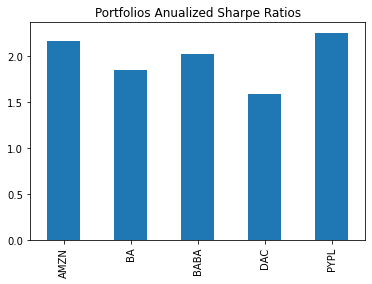

In [259]:
# Visualize the sharpe ratios as a bar plot
correlation.sum(axis=0).plot(kind = 'bar', title = 'Portfolios Anualized Sharpe Ratios')

### How does your portfolio do?

Write your answer here!